<a href="https://colab.research.google.com/github/fequeiroz/artificial-inteligence/blob/main/NaiveBayesAntiSpam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import nltk

from nltk.corpus import stopwords

import string

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

In [6]:

#nltk.download('all')

mensagem = pd.read_csv('spam.csv', encoding='latin-1')

mensagem = mensagem.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

mensagem = mensagem.rename(columns={'v1': 'tipo','v2': 'mensagem'})
print(mensagem)

      tipo                                           mensagem
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [7]:
def processaTexto(texto):
    #remove pontuação caractere a caractere
    remove_pontuacao = [char for char in texto if char not in string.punctuation]
    #junta os caracteres em palavras novamente
    remove_pontuacao = ''.join(remove_pontuacao)
    
    #nopunc.split() separa cada frase em palavras, retirando as que estão dentro de stopwords
    #word.lower() torna todas as letras minúsculas
    #essa linha remove as stopwords, retornando apenas as palavras relevantes para a análise
    frase_limpa = [word for word in remove_pontuacao.split() if word.lower() not in stopwords.words('english')]
        
    return frase_limpa


## Análise Estatisticas, quantidade de caracteres em cada sms


Histograma da quantidade de caracteres
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       499
        spam       1.00      0.69      0.82        59

    accuracy                           0.97       558
   macro avg       0.98      0.85      0.90       558
weighted avg       0.97      0.97      0.97       558



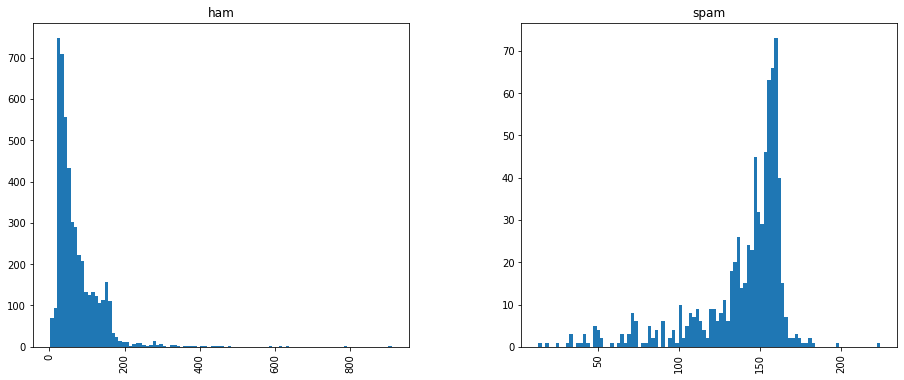

In [8]:





#print(messages.iloc[:,2])


# print('ham')
# print(mensagem.groupby('tipo').describe().iloc[0]) #quantidade de ham count = quantiadade, unique= mensagens únicas, não repetidas, top = a mais repetida, freq = quantidade de vezes que é repetida 
# print('\nspam')
# print(mensagem.groupby('tipo').describe().iloc[1]) #quantidade de spam 

#desenha um gráfico do número de mensagens pelo tamanho
#podemos ver pela figura que as mensagens não spam (ham) possuem mensagens com menos de
#200 caracteres (em média 100 para ser preciso), já as mensagens SPAM tendem a ser
#maiores do que 100, oscilando entre 130 e 140

mensagem['length'] = mensagem['mensagem'].apply(len)

mensagem['mensagem'].apply(processaTexto)
msg_train, msg_test, class_train, class_test = train_test_split(mensagem['mensagem'], mensagem['tipo'], test_size=0.1)
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = processaTexto)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])


pipeline.fit(msg_train, class_train)

predictions = pipeline.predict(msg_test)

mensagem.hist(column='length',by='tipo', bins=100, figsize=(15,6))

print('\nHistograma da quantidade de caracteres')
print(classification_report(class_test, predictions))



